### Import Libraries

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

import clr_envs

### Compare spaces
Compare observation and action spaces for the simplified problem environment and the full problem environment.

In [2]:
# Get a simplified problem environment
env_sim = gym.make('LoadRestoration13BusUnbalancedSimplified-v0')

print(env_sim.observation_space)
print(env_sim.action_space)

Box([ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. -1. -1.], 1.0, (44,), float64)
Box(-1.0, 1.0, (6,), float64)


For the full problem, we set forecast length to 1 (hour), the default value for the simplified problem, so the observation space has the same dimension.

The action space is expanded to include the control over load pick-up.

In [3]:
# Get a full problem environment
env_full = gym.make('LoadRestoration13BusUnbalancedFull-v0')
clr_env_config = {'error_level': 0.15, 'forecast_len': 1}
env_full.unwrapped.set_configuration(clr_env_config)

print("observation space:")
print(env_full.observation_space)
print("action space:")
print(env_full.action_space)

The environment uses 0.150000 for error_level.
The environment uses 1 hours of forecast information.
observation space:
Box([ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. -1. -1.], 1.0, (44,), float64)
action space:
Box(-1.0, 1.0, (19,), float64)


Observation space becomes larger if we include more renewable forecasts, e.g., forecast length to 4 (hours).

In [4]:
# Change the full problem environment to use 4-hour forecasts
clr_env_config = {'error_level': 0.15, 'forecast_len': 4}
env_full.unwrapped.set_configuration(clr_env_config)

print("observation space:")
print(env_full.observation_space)
print("action space:")
print(env_full.action_space)

The environment uses 0.150000 for error_level.
The environment uses 4 hours of forecast information.
observation space:
Box([ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. -1. -1.], 1.0, (116,), float64)
action space:
Box(-1.0, 1.0, (19,), float64)


### Compare observation

In [5]:
reset_options = {'start_index': 9600, 'init_storage': 900.}

In [6]:
# Set back to 1-hour forecast.
clr_env_config = {'error_level': 0.15, 'forecast_len': 1}
env_full.unwrapped.set_configuration(clr_env_config)

obs_sim, _ = env_sim.reset(options=reset_options)
obs_full, _ = env_full.reset(options=reset_options)

The environment uses 0.150000 for error_level.
The environment uses 1 hours of forecast information.
The initial storage for the battery system is 900.000000.
Scenario index used here is 9600
The initial storage for the battery system is 900.000000.
Scenario index used here is 9600


Observation below are almost the same, except the renewable forecasts are slightly different (due to predict error).

In [7]:
print(obs_sim)
print()
print(obs_full)

[ 0.70473251  0.71502058  0.7191358   0.72839506  0.73559671  0.74125514
  0.74331276  0.75205761  0.75        0.74074074  0.7340535   0.7345679
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.72        1.          0.
  0.8660254  -0.5       ]

[ 0.70473251  0.72467578  0.7219993   0.72843675  0.73956037  0.73286123
  0.75243865  0.77136068  0.74361371  0.75340047  0.78495945  0.81173555
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00272293  0.          0.0258726   0.03325843
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.72        1.          0.
  0.8660254  -0.5       

### Visualize what forecasts are used.

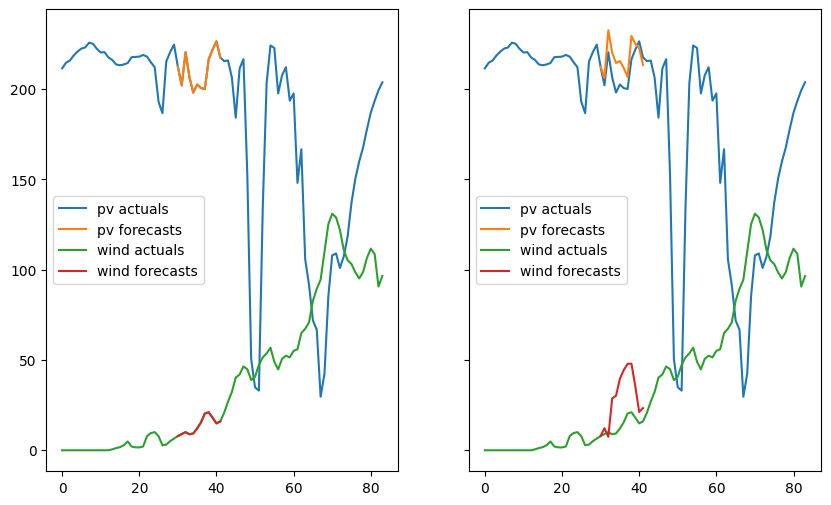

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

step_idx = 30

axes[0].plot(env_sim.unwrapped.pv_profile, label='pv actuals')
axes[0].plot(range(step_idx, step_idx + 12), 
             env_sim.unwrapped.pv_profile[step_idx: step_idx + 12],
             label='pv forecasts')
axes[0].plot(env_sim.unwrapped.wt_profile, label='wind actuals')
axes[0].plot(range(step_idx, step_idx + 12), 
             env_sim.unwrapped.wt_profile[step_idx: step_idx + 12],
             label='wind forecasts')
axes[0].legend()

axes[1].plot(env_full.unwrapped.pv_profile, label='pv actuals')
axes[1].plot(range(step_idx, step_idx + 12), 
             np.array(env_full.unwrapped.renewable_pseudo_forecasts[str(step_idx)]['pv'][0: 12]) * env_full.unwrapped.pv_max_gen,
             label='pv forecasts')
axes[1].plot(env_full.unwrapped.wt_profile, label='wind actuals')
axes[1].plot(range(step_idx, step_idx + 12), 
             np.array(env_full.unwrapped.renewable_pseudo_forecasts[str(step_idx)]['wind'][0: 12]) * env_full.unwrapped.wind_max_gen,
             label='wind forecasts')
axes[1].legend()

plt.show()

In the full problem environment, since we set the error level to be 15% in the variable `clr_env_config`. The right figure shows that the RL controller gets inaccurate forecasts for decision making. 

See [our paper (Section IV)](https://arxiv.org/abs/2203.04166) for more details on the definitions of error levels and how imperfect forecasts are generated.